# IoT Aides Project (Wingbeat Audio Classification)

#### Developed by: Husnul Amri

## 1. Creating Classification Model

In [1]:
#Code adapted from: https://medium.com/@sdoshi579/classification-of-music-into-different-genres-using-keras-82ab5339efe0
#with some modification to work on this project

#importing important library
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, LabelBinarizer

#Keras
import keras

Using TensorFlow backend.


In [106]:
#Creating Header for the CSV file on each features
# header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
header = 'filename'
for i in range(1, 14):
    header += f' mfcc{i}'
for i in range(1,14):
    header += f' mfcc_delta{i}'
for i in range(1,14):
    header += f' mfcc_delta^2_{i}'
header += ' label'
header = header.split()

#defining the dataset label based on the name
def label_wav(filename):
    word_label = filename.split('_')[0]
    if word_label == 'aegyptibetina': return 'aegypti'
    if word_label == 'aegypti': return 'aegypti'
    if word_label == 'albopictus': return 'others'
    if word_label == 'aegyptijantan': return 'others'
    if word_label == 'albojantan': return 'others'
    elif word_label == 'AlboBetina': return 'others'

In [107]:
#Creating CSV file with audio feature extraction
file = open('data_final.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for filename in os.listdir(f'./rekaman_nyamuk/'):
    songname = f'./rekaman_nyamuk/{filename}'
    labels = label_wav(filename)
    y, sr = librosa.load(songname, mono=True, duration=25)
#     chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
#     rmse = librosa.feature.rms(y=y)
#     spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#     spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
#     rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
#     zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13,fmin=400, fmax=10000)
#     mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc,order=2)
#     to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    to_append = f'{filename}'
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    for e in mfcc_delta:
        to_append += f' {np.mean(e)}'
    for e in mfcc_delta2:
        to_append += f' {np.mean(e)}'
    to_append += f' {labels}'
    file = open('data_final.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

/home/moezeus/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/moezeus/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/moezeus/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/moezeus/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/moezeus/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audior

In [108]:
#read the CSV file to dataframe
data = pd.read_csv('data_final.csv')
# data = data.reindex(np.random.permutation(data.index)) 
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
#encode the mosquito name to binary
mosq_list = data.iloc[:, -1]
encoder = LabelBinarizer()
y = encoder.fit_transform(mosq_list)
#convert the encode result to 2D array format
yr = np.array([[item[0], 0 if item[0] else 1] for item in y])
#insert the other row to X
X = np.array(data.iloc[:, :-1])
# X = MinMaxScaler().fit_transform(X)

In [109]:
#Creating data train and test for validation and training process
X_train, X_test, y_train, y_test = train_test_split(X, yr, test_size=0.2)

In [110]:
#Defining classification model (Learning)
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_dim=39))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [111]:
#Training process
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

Train on 202 samples, validate on 51 samples
Epoch 1/1000
202/202 [==============================] - 0s 895us/step - loss: 3.7043 - accuracy: 0.6881 - val_loss: 2.4364 - val_accuracy: 0.6275
Epoch 2/1000
202/202 [==============================] - 0s 84us/step - loss: 1.7480 - accuracy: 0.6881 - val_loss: 1.3891 - val_accuracy: 0.4118
Epoch 3/1000
202/202 [==============================] - 0s 111us/step - loss: 1.2485 - accuracy: 0.5149 - val_loss: 1.8882 - val_accuracy: 0.5686
Epoch 4/1000
202/202 [==============================] - 0s 151us/step - loss: 0.9726 - accuracy: 0.6386 - val_loss: 1.1405 - val_accuracy: 0.5490
Epoch 5/1000
202/202 [==============================] - 0s 95us/step - loss: 0.8311 - accuracy: 0.6535 - val_loss: 1.0605 - val_accuracy: 0.5882
Epoch 6/1000
202/202 [==============================] - 0s 128us/step - loss: 0.6742 - accuracy: 0.6832 - val_loss: 1.0291 - val_accuracy: 0.5490
Epoch 7/1000
202/202 [==============================] - 0s 179us/step - loss: 0.5

202/202 [==============================] - 0s 91us/step - loss: 0.0233 - accuracy: 0.9901 - val_loss: 0.1562 - val_accuracy: 0.9804
Epoch 113/1000
202/202 [==============================] - 0s 89us/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.1819 - val_accuracy: 0.9608
Epoch 114/1000
202/202 [==============================] - 0s 89us/step - loss: 0.0217 - accuracy: 0.9901 - val_loss: 0.1583 - val_accuracy: 0.9804
Epoch 115/1000
202/202 [==============================] - 0s 87us/step - loss: 0.0233 - accuracy: 0.9901 - val_loss: 0.1526 - val_accuracy: 0.9804
Epoch 116/1000
202/202 [==============================] - 0s 94us/step - loss: 0.0203 - accuracy: 0.9950 - val_loss: 0.1576 - val_accuracy: 0.9804
Epoch 117/1000
202/202 [==============================] - 0s 81us/step - loss: 0.0206 - accuracy: 0.9901 - val_loss: 0.1463 - val_accuracy: 0.9804
Epoch 118/1000
202/202 [==============================] - 0s 86us/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.1574 - val_acc

Epoch 168/1000
202/202 [==============================] - 0s 104us/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.1416 - val_accuracy: 0.9804
Epoch 169/1000
202/202 [==============================] - 0s 104us/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.1283 - val_accuracy: 0.9804
Epoch 170/1000
202/202 [==============================] - 0s 83us/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.1533 - val_accuracy: 0.9804
Epoch 171/1000
202/202 [==============================] - 0s 89us/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.1224 - val_accuracy: 0.9804
Epoch 172/1000
202/202 [==============================] - 0s 83us/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.1440 - val_accuracy: 0.9804
Epoch 173/1000
202/202 [==============================] - 0s 85us/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.1288 - val_accuracy: 0.9804
Epoch 174/1000
202/202 [==============================] - 0s 89us/step - loss: 0.0086 - accuracy: 1.0000 - val_loss:

Epoch 279/1000
202/202 [==============================] - 0s 100us/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1475 - val_accuracy: 0.9804
Epoch 280/1000
202/202 [==============================] - 0s 89us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1498 - val_accuracy: 0.9804
Epoch 281/1000
202/202 [==============================] - 0s 102us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1491 - val_accuracy: 0.9804
Epoch 282/1000
202/202 [==============================] - 0s 87us/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1536 - val_accuracy: 0.9804
Epoch 283/1000
202/202 [==============================] - 0s 83us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1508 - val_accuracy: 0.9804
Epoch 284/1000
202/202 [==============================] - 0s 88us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1430 - val_accuracy: 0.9804
Epoch 285/1000
202/202 [==============================] - 0s 87us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss:

Epoch 390/1000
202/202 [==============================] - 0s 73us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1714 - val_accuracy: 0.9804
Epoch 391/1000
202/202 [==============================] - 0s 96us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1814 - val_accuracy: 0.9804
Epoch 392/1000
202/202 [==============================] - 0s 93us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1691 - val_accuracy: 0.9804
Epoch 393/1000
202/202 [==============================] - 0s 80us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1736 - val_accuracy: 0.9804
Epoch 394/1000
202/202 [==============================] - 0s 80us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1738 - val_accuracy: 0.9804
Epoch 395/1000
202/202 [==============================] - 0s 86us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1643 - val_accuracy: 0.9804
Epoch 396/1000
202/202 [==============================] - 0s 94us/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0

202/202 [==============================] - 0s 85us/step - loss: 7.2102e-04 - accuracy: 1.0000 - val_loss: 0.1996 - val_accuracy: 0.9804
Epoch 500/1000
202/202 [==============================] - 0s 105us/step - loss: 7.2583e-04 - accuracy: 1.0000 - val_loss: 0.1943 - val_accuracy: 0.9804
Epoch 501/1000
202/202 [==============================] - 0s 103us/step - loss: 7.0675e-04 - accuracy: 1.0000 - val_loss: 0.1981 - val_accuracy: 0.9804
Epoch 502/1000
202/202 [==============================] - 0s 86us/step - loss: 8.3570e-04 - accuracy: 1.0000 - val_loss: 0.2113 - val_accuracy: 0.9804
Epoch 503/1000
202/202 [==============================] - 0s 87us/step - loss: 8.6196e-04 - accuracy: 1.0000 - val_loss: 0.1912 - val_accuracy: 0.9804
Epoch 504/1000
202/202 [==============================] - 0s 91us/step - loss: 7.8574e-04 - accuracy: 1.0000 - val_loss: 0.2088 - val_accuracy: 0.9804
Epoch 505/1000
202/202 [==============================] - 0s 84us/step - loss: 7.4455e-04 - accuracy: 1.000

202/202 [==============================] - 0s 96us/step - loss: 4.2036e-04 - accuracy: 1.0000 - val_loss: 0.2258 - val_accuracy: 0.9804
Epoch 608/1000
202/202 [==============================] - 0s 96us/step - loss: 4.4550e-04 - accuracy: 1.0000 - val_loss: 0.2272 - val_accuracy: 0.9804
Epoch 609/1000
202/202 [==============================] - 0s 88us/step - loss: 4.1442e-04 - accuracy: 1.0000 - val_loss: 0.2222 - val_accuracy: 0.9804
Epoch 610/1000
202/202 [==============================] - 0s 92us/step - loss: 4.1025e-04 - accuracy: 1.0000 - val_loss: 0.2204 - val_accuracy: 0.9804
Epoch 611/1000
202/202 [==============================] - 0s 106us/step - loss: 4.1221e-04 - accuracy: 1.0000 - val_loss: 0.2303 - val_accuracy: 0.9804
Epoch 612/1000
202/202 [==============================] - 0s 90us/step - loss: 4.0950e-04 - accuracy: 1.0000 - val_loss: 0.2285 - val_accuracy: 0.9804
Epoch 613/1000
202/202 [==============================] - 0s 112us/step - loss: 4.1615e-04 - accuracy: 1.000

Epoch 661/1000
202/202 [==============================] - 0s 87us/step - loss: 3.3079e-04 - accuracy: 1.0000 - val_loss: 0.2372 - val_accuracy: 0.9804
Epoch 662/1000
202/202 [==============================] - 0s 95us/step - loss: 3.2028e-04 - accuracy: 1.0000 - val_loss: 0.2379 - val_accuracy: 0.9804
Epoch 663/1000
202/202 [==============================] - 0s 92us/step - loss: 3.1748e-04 - accuracy: 1.0000 - val_loss: 0.2356 - val_accuracy: 0.9804
Epoch 664/1000
202/202 [==============================] - 0s 99us/step - loss: 3.2055e-04 - accuracy: 1.0000 - val_loss: 0.2317 - val_accuracy: 0.9804
Epoch 665/1000
202/202 [==============================] - 0s 92us/step - loss: 3.2348e-04 - accuracy: 1.0000 - val_loss: 0.2322 - val_accuracy: 0.9804
Epoch 666/1000
202/202 [==============================] - 0s 85us/step - loss: 3.1686e-04 - accuracy: 1.0000 - val_loss: 0.2353 - val_accuracy: 0.9804
Epoch 667/1000
202/202 [==============================] - 0s 84us/step - loss: 3.2591e-04 - ac

202/202 [==============================] - 0s 90us/step - loss: 2.0044e-04 - accuracy: 1.0000 - val_loss: 0.2568 - val_accuracy: 0.9804
Epoch 770/1000
202/202 [==============================] - 0s 96us/step - loss: 1.9415e-04 - accuracy: 1.0000 - val_loss: 0.2489 - val_accuracy: 0.9804
Epoch 771/1000
202/202 [==============================] - 0s 85us/step - loss: 2.0175e-04 - accuracy: 1.0000 - val_loss: 0.2512 - val_accuracy: 0.9804
Epoch 772/1000
202/202 [==============================] - 0s 99us/step - loss: 1.9770e-04 - accuracy: 1.0000 - val_loss: 0.2524 - val_accuracy: 0.9804
Epoch 773/1000
202/202 [==============================] - 0s 74us/step - loss: 2.1037e-04 - accuracy: 1.0000 - val_loss: 0.2631 - val_accuracy: 0.9804
Epoch 774/1000
202/202 [==============================] - 0s 85us/step - loss: 2.0444e-04 - accuracy: 1.0000 - val_loss: 0.2559 - val_accuracy: 0.9804
Epoch 775/1000
202/202 [==============================] - 0s 96us/step - loss: 1.8966e-04 - accuracy: 1.0000 

202/202 [==============================] - 0s 100us/step - loss: 1.2373e-04 - accuracy: 1.0000 - val_loss: 0.2705 - val_accuracy: 0.9804
Epoch 878/1000
202/202 [==============================] - 0s 89us/step - loss: 1.2165e-04 - accuracy: 1.0000 - val_loss: 0.2733 - val_accuracy: 0.9804
Epoch 879/1000
202/202 [==============================] - 0s 90us/step - loss: 1.2107e-04 - accuracy: 1.0000 - val_loss: 0.2753 - val_accuracy: 0.9804
Epoch 880/1000
202/202 [==============================] - 0s 82us/step - loss: 1.1922e-04 - accuracy: 1.0000 - val_loss: 0.2770 - val_accuracy: 0.9804
Epoch 881/1000
202/202 [==============================] - 0s 83us/step - loss: 1.2096e-04 - accuracy: 1.0000 - val_loss: 0.2761 - val_accuracy: 0.9804
Epoch 882/1000
202/202 [==============================] - 0s 88us/step - loss: 1.2619e-04 - accuracy: 1.0000 - val_loss: 0.2792 - val_accuracy: 0.9804
Epoch 883/1000
202/202 [==============================] - 0s 80us/step - loss: 1.2031e-04 - accuracy: 1.0000

202/202 [==============================] - 0s 88us/step - loss: 7.7932e-05 - accuracy: 1.0000 - val_loss: 0.2889 - val_accuracy: 0.9804
Epoch 986/1000
202/202 [==============================] - 0s 86us/step - loss: 7.6759e-05 - accuracy: 1.0000 - val_loss: 0.2912 - val_accuracy: 0.9804
Epoch 987/1000
202/202 [==============================] - 0s 109us/step - loss: 7.6244e-05 - accuracy: 1.0000 - val_loss: 0.2917 - val_accuracy: 0.9804
Epoch 988/1000
202/202 [==============================] - 0s 88us/step - loss: 7.6305e-05 - accuracy: 1.0000 - val_loss: 0.2968 - val_accuracy: 0.9804
Epoch 989/1000
202/202 [==============================] - 0s 95us/step - loss: 7.8149e-05 - accuracy: 1.0000 - val_loss: 0.2945 - val_accuracy: 0.9804
Epoch 990/1000
202/202 [==============================] - 0s 90us/step - loss: 7.5456e-05 - accuracy: 1.0000 - val_loss: 0.2917 - val_accuracy: 0.9804
Epoch 991/1000
202/202 [==============================] - 0s 99us/step - loss: 7.4779e-05 - accuracy: 1.0000

In [103]:
#getting accuracy and loss data
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc,test_loss)

38/38 [==============================] - 0s 162us/step
test_acc:  0.9736841917037964 0.25200567276854263


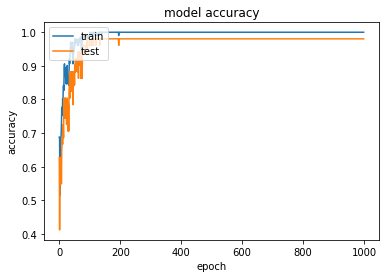

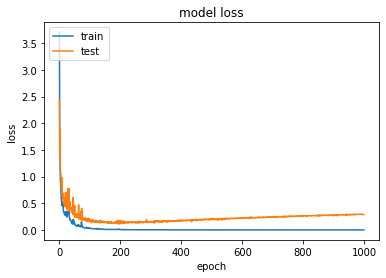

In [112]:
#Plotting Accuracy and loss graphics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [113]:
model.save('aides_classification_final.h5')

In [44]:
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold
import numpy
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# yyr = label_encoder.fit_transform(yr)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=55)
cvscores = []
for train, test in kfold.split(X, y):
  # create model
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_dim=13))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    # Compile model
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    # Fit the model
    model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
accuracy: 100.00%
100.00% (+/- 0.00%)


In [19]:
yr.shape

(120, 2)

 ## 2. Prediction (Validation Using Recorded Data)

In [3]:
from keras.models import load_model
model = load_model ("aides_classification_6.h5")
songname = f'./Aides_testData/{filename}'
y, sr = librosa.load(songname, mono=True, duration=30)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, fmax=1000)
mean = np.std(mfcc, axis=1)
mean = np.array(mean.reshape(1,-1))
X_ujii = mean
a=model.predict(X_ujii)
#Give percentage of the results
predicts1 = {"aegypti":round((a[0][1]*100),2),
             "others":round((a[0][0]*100),2)}
print('PREDICTION RESULT:')
for key, value in sorted(predicts1.items(), key=lambda item: item[1], reverse=True):
    print(f"{key}\t: {value} %")

NameError: name 'filename' is not defined

In [102]:
y, sr = librosa.load('anekoik.m4a', mono=True, duration=30)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13,fmin=400, fmax=10000)
mfcc_delta = librosa.feature.delta(mfcc)
mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
mean = np.mean(mfcc, axis=1)
mean_delta = np.mean(mfcc_delta, axis=1)
mean_delta2 = np.mean(mfcc_delta2, axis=1)
# mean_delta = np.array(mean_delta.reshape(1,-1))
# mean = np.array(mean.reshape(1,-1))

/home/moezeus/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [103]:
(mean_delta.T).shape

(13,)

In [104]:
import pandas as pd 
df = pd.DataFrame(mean)
df1 = pd.DataFrame(mean_delta)
df2 = pd.DataFrame(mean_delta2)

In [105]:
df = df.append(df1, ignore_index=True)
df = df.append(df2, ignore_index=True)
df = df.T
XY = np.array(df)

In [111]:
# pca = PCA(n_components=7)
# dataset = pca.fit(X_uji)
tesss = pca.fit(XY)
# tesss = pca.transform(XY)


ValueError: n_components=7 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [95]:
X.shape

(1, 39)